   index     video_id trending_date  \
0      0  2kyS6SvSYSE      17.14.11   
1      1  1ZAPwfrtAFY      17.14.11   
2      2  5qpjK5DgCt4      17.14.11   
3      3  puqaWrEC7tY      17.14.11   
4      4  d380meD0W0M      17.14.11   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id publish_date      time_frame published_day_of_week  \
0           22   13/11/2017  17:00 to 17:59                Monday   
1           24   13/11/2017    7:00 to 7:59                Monday   
2           23   12/11/2017  19:00 to 19:59                Sunday   
3           24

C:\Users\bhaskar\AppData\Local\Temp\ipykernel_16220\4213899053.py:18: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['publish_time'] = pd.to_datetime(df['publish_date'] + ' ' + df['time_frame'].str.split(' to ').str[0])


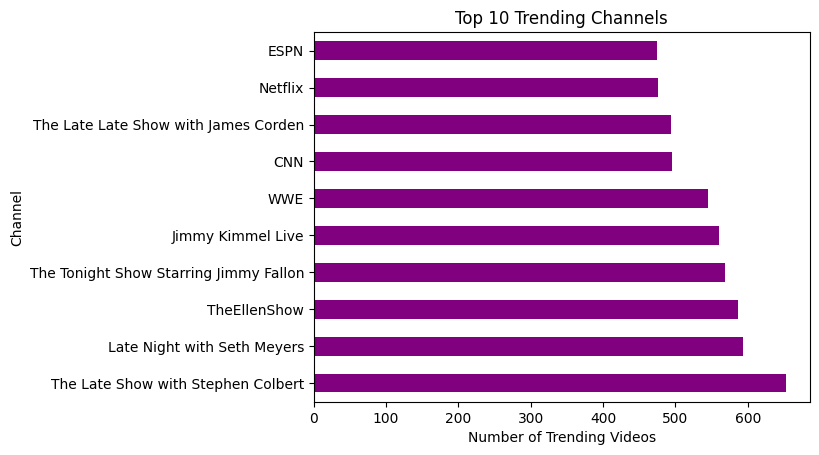

Average Views: 2419854.10
Average Likes: 65661.94
Average Comments: 7035.49


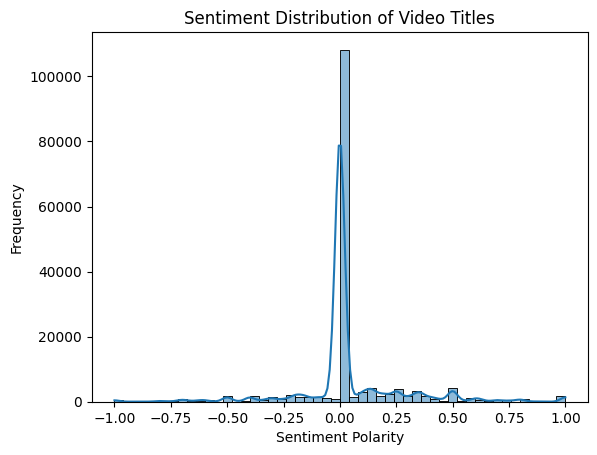

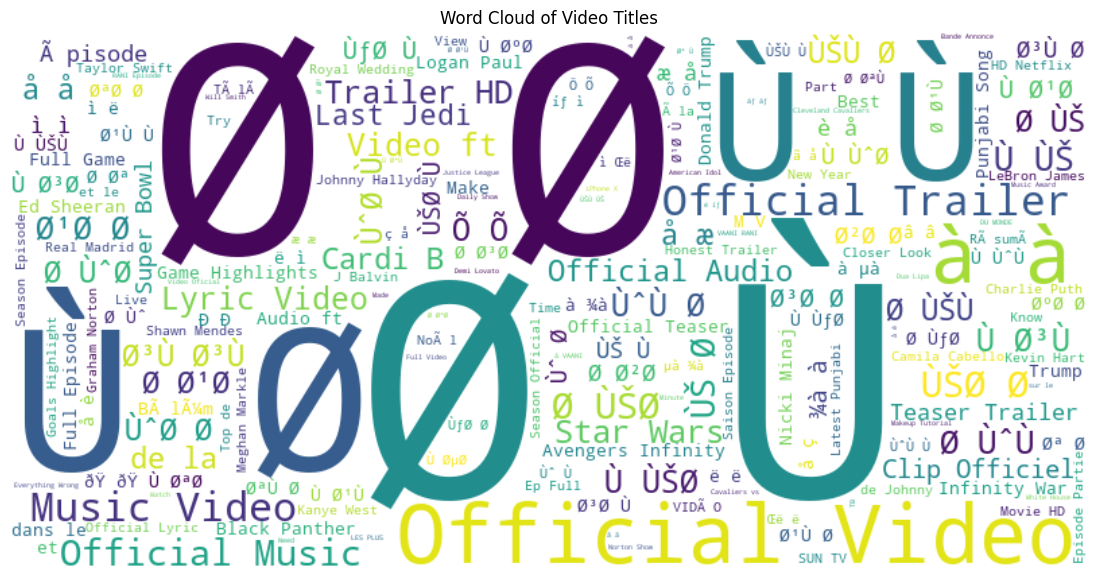

In [18]:
# Install required packages
# pip install pandas matplotlib seaborn wordcloud textblob

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob

# Load the dataset
df = pd.read_csv("data/youtube.csv")

# Data overview
print(df.head())
print(df.info())

# --- Data Cleaning ---
df['publish_time'] = pd.to_datetime(df['publish_date'] + ' ' + df['time_frame'].str.split(' to ').str[0])
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')

# Fill NA values in tags
df['tags'] = df['tags'].fillna('')

# Drop duplicates
df = df.drop_duplicates()

# --- Most Trending Channels ---
top_channels = df['channel_title'].value_counts().head(10)
top_channels.plot(kind='barh', color='purple')
plt.title("Top 10 Trending Channels")
plt.xlabel("Number of Trending Videos")
plt.ylabel("Channel")
plt.show()

# --- Average Views, Likes, Comments ---
avg_views = df['views'].mean()
avg_likes = df['likes'].mean()
avg_comments = df['comment_count'].mean()

print(f"Average Views: {avg_views:.2f}")
print(f"Average Likes: {avg_likes:.2f}")
print(f"Average Comments: {avg_comments:.2f}")

# --- Sentiment Analysis on Titles ---
def get_sentiment(text):
    blob = TextBlob(str(text))
    return blob.sentiment.polarity

df['title_sentiment'] = df['title'].apply(get_sentiment)

sns.histplot(df['title_sentiment'], bins=50, kde=True)
plt.title("Sentiment Distribution of Video Titles")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Frequency")
plt.show()

# --- Word Cloud of Titles ---
text = " ".join(title for title in df['title'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Video Titles")
plt.show()
